# Q-1 Implement a KNN model to classify the animals in to categorie

In [375]:
#import library
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [376]:
#Load a dataset
df=pd.read_csv("E:\DATA SCIENCE\LMS\ASSIGNMENT\MY ASSIGNMENT\KNN\zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


C:\Users\anku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

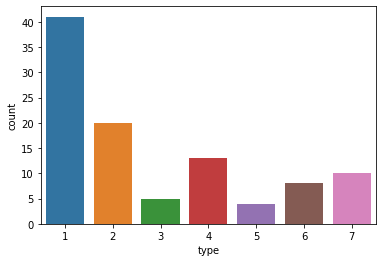

In [377]:
sns.countplot(df['type'])
# multiclass classification problem

In [378]:
#count value for type
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [379]:
# check Data type and shape
print(df.shape)
print(df.dtypes)

(101, 18)
animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object


In [380]:
#check null values
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [381]:
#check duplicated
df.drop_duplicates(subset=['animal name'])

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [382]:
x =df.iloc[:,1:17]
y =df.iloc[:,17]

In [383]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [384]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [385]:
from sklearn.preprocessing import StandardScaler
# scaling the input
scaler = StandardScaler()
scaled_input = scaler.fit_transform(x)
print(scaled_input)

[[ 1.16139451 -0.49690399 -1.18522652 ... -1.69841555 -0.38435306
   1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]
 ...
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ... -1.69841555 -0.38435306
  -0.87859537]
 [-0.86103386  2.01246118  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]]


# KNN classification

In [386]:
#knn classification
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [387]:
num_folds = 10
Kfold = KFold(n_splits=10)
model =  KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model,scaled_input,y, cv=Kfold)

In [388]:
print(results.mean()*100)

83.0


# For decide vaulues of k
Grib Search for Algorithm Tuning

In [389]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [390]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model =  KNeighborsClassifier()
grid  =  GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(scaled_input,y)

C:\Users\anku\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [391]:
print(grid.best_score_)
print(grid.best_params_)

0.9504761904761905
{'n_neighbors': 1}


In [425]:
num_folds = 10
Kfold = KFold(n_splits=10)
model =  KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model,scaled_input,y, cv=Kfold)

In [426]:
print(results.mean()*100)

95.0


In [427]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Model evaulating using Train test split

In [428]:
# model evaulating using Train test split
x_train,x_test,y_train,y_test = train_test_split(scaled_input,y,test_size=0.33,random_state=7)

In [429]:
model = LogisticRegression()
model.fit(x_train,y_train)
result = model.score(x_test,y_test)

In [430]:
result*100

97.05882352941177

# SVM classification 

In [431]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split ,cross_val_score

In [432]:
clf =SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,0.1,00.1]}]
gsv =GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

C:\Users\anku\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 0.1, 0.1],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [433]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7499999999999999)

In [434]:
clf = SVC(C= 15,gamma=0.5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)*100
print("Accuracy =",acc)

Accuracy = 73.52941176470588


Q-2 Prepare a model for glass classification using KNN
Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron
Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [435]:
#import library
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [436]:
#Load a dataset
dg=pd.read_csv("E:\DATA SCIENCE\LMS\ASSIGNMENT\MY ASSIGNMENT\KNN\glass.csv")
dg

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


C:\Users\anku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

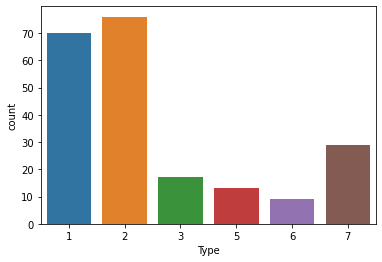

In [437]:
sns.countplot(dg['Type'])
# multiclass classification problem

In [438]:
#count value for type
dg['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [439]:
# check Data type and shape
print(dg.shape)
print(dg.dtypes)

(214, 10)
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [440]:
#check null values
dg.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [441]:
x1 =dg.iloc[:,0:9]
y1 =dg.iloc[:,9]

In [442]:
from sklearn.preprocessing import StandardScaler
# scaling the input
scaler = StandardScaler()
scaledx1 = scaler.fit_transform(x1)
print(scaledx1)

[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


In [443]:
scaledx1

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [444]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

# KNN classification

In [445]:
#knn classification
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [446]:
num_folds = 10
Kfold = KFold(n_splits=10)
model2 =  KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model2,scaledx1,y1, cv=Kfold)

In [447]:
print(results2.mean()*100)

58.44155844155845


# For decide vaulues of k
Grib Search for Algorithm Tuning

In [448]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [449]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model =  KNeighborsClassifier()
grid  =  GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(scaledx1,y1)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [450]:
print(grid.best_score_)
print(grid.best_params_)

0.6729789590254706
{'n_neighbors': 2}


In [451]:
num_folds = 10
Kfold = KFold(n_splits=10)
model =  KNeighborsClassifier(n_neighbors=2)
results = cross_val_score(model,scaledx1,y1, cv=Kfold)

In [455]:
print(results2.mean()*100)

58.44155844155845


In [456]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Model evaulating using Train test split

In [461]:
# model evaulating using Train test split
x_train,x_test,y_train,y_test = train_test_split(scaledx1,y1,test_size=0.33,random_state=7)

In [462]:
model = LogisticRegression()
model.fit(x_train,y_train)
result = model.score(x_test,y_test)

In [463]:
result*100

70.4225352112676

SVM Classification

In [465]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split ,cross_val_score

In [466]:
clf =SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,0.1,00.1]}]
gsv =GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

C:\Users\anku\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 0.1, 0.1],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [467]:
gsv.best_params_,gsv.best_score_

({'C': 12, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7066666666666667)

In [469]:
clf = SVC(C= 12,gamma=0.5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)*100
print("Accuracy =",acc)

Accuracy = 73.23943661971832
